In [51]:
import pandas as pd
import numpy as np

In [52]:
df=pd.read_csv('../doge_v1.csv',index_col='Date',parse_dates=True)
print('Shape of data',df.shape)
df.head()

Shape of data (1546, 23)


,Open,High,Low,Close,Adj Close,Volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,...,subscribers,total_issues,closed_issues,pull_requests_merged,pull_request_contributors,commit_count_4_weeks,dogecoin_unscaled,dogecoin_monthly,scale,dogecoin
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,165257.000000,0.633,9.490,81680.0,...,225.0,395.000000,336.0,732.0,67.0,0.0,57,1.0,0.01,0.57
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,165308.000000,0.833,11.958,81723.0,...,225.0,395.166667,336.0,732.0,67.0,0.0,24,1.0,0.01,0.24
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,165363.000000,0.980,13.224,81772.0,...,225.0,395.333333,336.0,732.0,67.0,0.0,23,1.0,0.01,0.23
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,165402.000000,1.102,14.469,81831.0,...,225.0,395.500000,336.0,732.0,67.0,0.0,23,1.0,0.01,0.23
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,165452.666667,1.277,15.383,81878.0,...,225.0,395.666667,336.0,732.0,67.0,0.0,41,1.0,0.01,0.41


<AxesSubplot:xlabel='Date'>

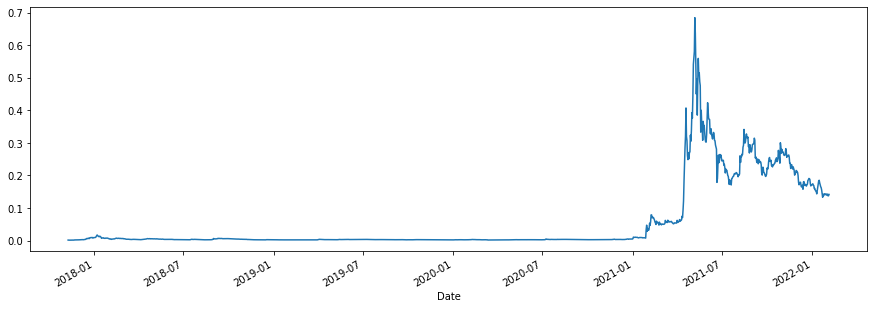

In [53]:
df['Close'].plot(figsize=(15,5))



In [54]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)


In [55]:
adf_test(df['Close'])

1. ADF :  -2.0148812101904006
2. P-Value :  0.28008656512652075
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1524
5. Critical Values :
	 1% :  -3.4346481290263013
	 5% :  -2.8634383565975736
	 10% :  -2.567780658251872


In [56]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Close'],
                          trace=True,
                          suppress_warnings=True)

stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9247.819, Time=7.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9213.910, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9213.980, Time=1.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9213.648, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9215.825, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9230.970, Time=5.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9220.133, Time=0.87 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-9271.104, Time=7.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-9224.054, Time=2.36 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-9272.422, Time=4.81 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-9271.374, Time=1.46 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-9271.675, Time=4.14 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-9275.480, Time=1.99 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-9270.622, Time=9.77 sec
 ARIMA(5,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1546
Model:               SARIMAX(5, 1, 5)   Log Likelihood                4661.907
Date:                Thu, 10 Feb 2022   AIC                          -9301.814
Time:                        18:07:33   BIC                          -9243.044
Sample:                             0   HQIC                         -9279.952
                               - 1546                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2804      0.127     -2.205      0.027      -0.530      -0.031
ar.L2          0.1391      0.040      3.491      0.000       0.061       0.217
ar.L3         -0.1868      0.023     -8.287      0.000      -0.231      -0.143
ar.L4         -0.5495      0.037    -14.683      0.000      -0.623      -0.476
ar.L5         -0.4707      0.075     -6.245      0.000      -0.618      -0.323
ma.L1          0.2202      0.128      1.726      0.084      -0.030       0.470
ma.L2         -0.0747      0.050     -1.504      0.133      -0.172       0.023
ma.L3          0.2301      0.024      9.623      0.000       0.183       0.277
ma.L4          0.3755      0.038      9.810      0.000       0.300       0.451
ma.L5          0.4216      0.058      7.230      0.000       0.307       0.536
sigma2         0.0001    1.2e-06    116.863      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            266330.03
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):            2117.94   Skew:                            -1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        67.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
#Split train test 70:30
print(df.shape)
testNum = round(df.shape[0]*0.3)
train=df.iloc[:-testNum]
test=df.iloc[-testNum:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])


(1546, 23)
(1082, 23) (464, 23)
Open                           2.653000e-03
High                           2.893000e-03
Low                            2.636000e-03
Close                          2.679000e-03
Adj Close                      2.679000e-03
Volume                         1.221523e+08
twitter_followers              1.520220e+05
reddit_average_posts_48h       1.000000e+00
reddit_average_comments_48h    1.441700e+01
reddit_subscribers             1.680130e+05
reddit_accounts_active_48h     4.724615e+02
forks                          9.330000e+02
stars                          2.199000e+03
subscribers                    2.650000e+02
total_issues                   5.160000e+02
closed_issues                  4.660000e+02
pull_requests_merged           8.180000e+02
pull_request_contributors      7.700000e+01
commit_count_4_weeks           0.000000e+00
dogecoin_unscaled              1.000000e+02
dogecoin_monthly               0.000000e+00
scale                          0.000000e+00


In [58]:
#Treniranje modela nad 5,1,5
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(5,1,5))
model=model.fit()
model.summary()

C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1082
Model:                 ARIMA(5, 1, 5)   Log Likelihood                7235.571
Date:                Thu, 10 Feb 2022   AIC                         -14449.141
Time:                        18:07:35   BIC                         -14394.299
Sample:                    11-09-2017   HQIC                        -14428.376
                         - 10-25-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2951      0.005     54.780      0.000       0.285       0.306
ar.L2         -0.0313      0.008     -4.092      0.000      -0.046      -0.016
ar.L3         -0.5289      0.006    -84.029      0.000      -0.541      -0.517
ar.L4         -0.3342      0.006    -52.786      0.000      -0.347      -0.322
ar.L5          0.3355      0.005     63.323      0.000       0.325       0.346
ma.L1         -0.1616      0.008    -20.352      0.000      -0.177      -0.146
ma.L2          0.0017      0.009      0.192      0.848      -0.016       0.019
ma.L3          0.5827      0.011     51.507      0.000       0.561       0.605
ma.L4          0.2548      0.009     29.352      0.000       0.238       0.272
ma.L5         -0.1193      0.009    -12.702      0.000      -0.138      -0.101
sigma2      8.787e-08   1.22e-09     72.153      0.000    8.55e-08    9.03e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):             18822.34
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.68e+17. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

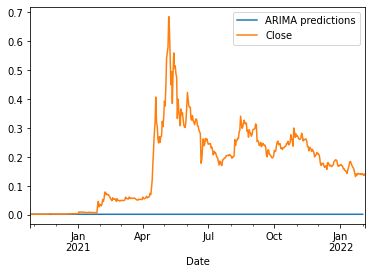

In [59]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)


In [60]:
#Sudeci po AIC vrednosti i grafiku, model je pretreniran. Povecajmo kolicinu trening podataka na 90%
print(df.shape)
testNum = round(df.shape[0]*0.1)
train=df.iloc[:-testNum]
test=df.iloc[-testNum:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1546, 23)
(1391, 23) (155, 23)
Open                           2.947540e-01
High                           3.044940e-01
Low                            2.885410e-01
Close                          2.962730e-01
Adj Close                      2.962730e-01
Volume                         2.384047e+09
twitter_followers              2.077708e+06
reddit_average_posts_48h       8.333000e+00
reddit_average_comments_48h    1.323833e+03
reddit_subscribers             2.150243e+06
reddit_accounts_active_48h     4.428462e+03
forks                          2.278000e+03
stars                          1.286300e+04
subscribers                    8.640000e+02
total_issues                   9.850000e+02
closed_issues                  8.770000e+02
pull_requests_merged           9.730000e+02
pull_request_contributors      1.180000e+02
commit_count_4_weeks           6.900000e+01
dogecoin_unscaled              8.800000e+01
dogecoin_monthly               7.000000e+00
scale                          7.000000e-02


In [61]:
#Treniranje modela nad 5,1,5, 90% uzorka
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(5,1,5))
model=model.fit()
model.summary()


C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1391
Model:                 ARIMA(5, 1, 5)   Log Likelihood                4175.334
Date:                Thu, 10 Feb 2022   AIC                          -8328.669
Time:                        18:07:41   BIC                          -8271.061
Sample:                             0   HQIC                         -8307.126
                               - 1391                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0209      0.016     -1.289      0.197      -0.053       0.011
ar.L2          0.0836      0.060      1.385      0.166      -0.035       0.202
ar.L3         -0.0177      0.060     -0.296      0.767      -0.135       0.099
ar.L4         -0.1026      0.061     -1.695      0.090      -0.221       0.016
ar.L5         -0.0234      0.043     -0.546      0.585      -0.107       0.061
ma.L1         -0.0223      0.014     -1.544      0.123      -0.051       0.006
ma.L2          0.0681      0.061      1.119      0.263      -0.051       0.187
ma.L3         -0.0124      0.061     -0.202      0.840      -0.133       0.108
ma.L4         -0.0973      0.068     -1.441      0.150      -0.230       0.035
ma.L5         -0.0169      0.043     -0.391      0.696      -0.101       0.068
sigma2         0.0001   1.15e-06    125.309      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            336663.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):            2059.16   Skew:                            -2.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        79.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.51e+18. Standard errors may be unstable.
"""

C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

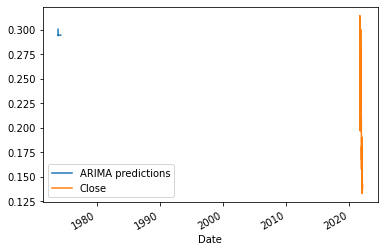

In [62]:
#Test za 10%
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [63]:
#Verovatno fale neki dani u podacima, hajde da proverim
pd.date_range(start = '2017-11-09', end = '2022-02-04' ).difference(df.index)


DatetimeIndex(['2021-04-16', '2021-05-05', '2021-05-09'], dtype='datetime64[ns]', freq=None)

In [64]:
#Hajde da popunim datume koji nedostaju
df = df.resample('D').ffill().reset_index()
pd.date_range(start = '2017-11-09', end = '2022-02-04' ).difference(df.index)


DatetimeIndex(['2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12',
               '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16',
               '2017-11-17', '2017-11-18',
               ...
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', length=1549, freq='D')

<AxesSubplot:>

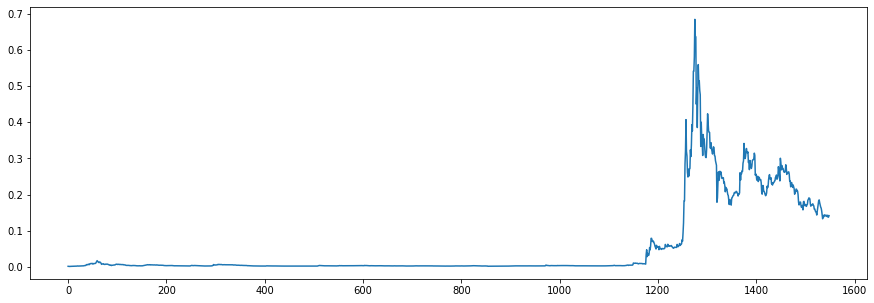

In [65]:
df['Close'].plot(figsize=(15,5))


In [66]:
print(df.shape)
testNum = round(df.shape[0]*0.1)
train=df.iloc[:-testNum]
test=df.iloc[-testNum:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])


(1549, 24)
(1394, 24) (155, 24)
Date                           2021-09-03 00:00:00
Open                                      0.294754
High                                      0.304494
Low                                       0.288541
Close                                     0.296273
Adj Close                                 0.296273
Volume                                  2384046931
twitter_followers                        2077708.0
reddit_average_posts_48h                     8.333
reddit_average_comments_48h               1323.833
reddit_subscribers                       2150243.0
reddit_accounts_active_48h             4428.461538
forks                                       2278.0
stars                                      12863.0
subscribers                                  864.0
total_issues                                 985.0
closed_issues                                877.0
pull_requests_merged                         973.0
pull_request_contributors                    118.0

In [67]:
#Treniranje modela nad 5,1,5, 90% uzorka
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(5,1,5))
model=model.fit()
model.summary()


C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1394
Model:                 ARIMA(5, 1, 5)   Log Likelihood                4219.863
Date:                Thu, 10 Feb 2022   AIC                          -8417.726
Time:                        18:07:51   BIC                          -8360.095
Sample:                             0   HQIC                         -8396.177
                               - 1394                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8566      0.050    -17.239      0.000      -0.954      -0.759
ar.L2         -0.0649      0.064     -1.017      0.309      -0.190       0.060
ar.L3          0.1411      0.061      2.313      0.021       0.022       0.261
ar.L4         -0.5929      0.041    -14.348      0.000      -0.674      -0.512
ar.L5         -0.5085      0.031    -16.305      0.000      -0.570      -0.447
ma.L1          0.7839      0.052     15.195      0.000       0.683       0.885
ma.L2          0.2577      0.065      3.955      0.000       0.130       0.385
ma.L3         -0.0521      0.068     -0.769      0.442      -0.185       0.081
ma.L4          0.6230      0.044     14.233      0.000       0.537       0.709
ma.L5          0.3881      0.037     10.394      0.000       0.315       0.461
sigma2         0.0001   1.08e-06    127.851      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):            263129.13
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):            1672.77   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        70.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

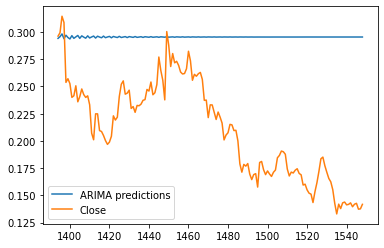

In [68]:
#Test za 10%
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)


<AxesSubplot:>

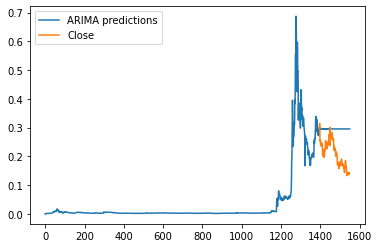

In [69]:
#Test za ceo uzorak
start=0
end=len(df)
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

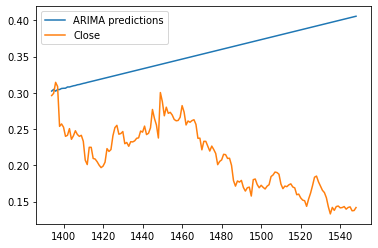

In [70]:
#Hajde da probam sa jacim diferenciranjem
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(5,2,5))
model=model.fit()
model.summary()
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [78]:
#Pojacavanje diferenciranja nije popravilo stvar. Hajde da uvedemo sezonalnost, i isprobamo SARIMAX


stepwise_model = auto_arima(train['Close'],start_p=1, d=1, start_q=1,
                            trace=True,
                            max_p=12, max_q=12,
                            m=52,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model.fit(train['Close'])


 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=-8279.403, Time=0.90 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=-8277.214, Time=207.63 sec


KeyboardInterrupt: 

C:\Users\Predrag\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

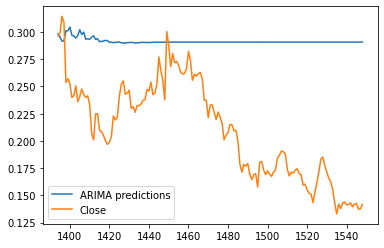

In [77]:
#Hajde da probam sarimax
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(2,1,0), seasonal_order=(2,0,1,7))
model=model.fit()
model.summary()
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [80]:
from python_scripts.sarima_helper import differentiate_untill_stationary

#Hajde da probamo rucno da podesimo parametre
differentiate_untill_stationary(df)

TypeError: float() argument must be a string or a real number, not 'Timestamp'